# Lista III de Descritiva #

Q2 - A planilha ”dadosmalariaCEA15P14.csv”contém dados de uma investigação sobre a incidência da malária durante a gravidez e os efeitos da infecção na mãe e no recém-nascido. O estudo foi realizado nos municı́pios de Cruzeiro do Sul, Mâncio Lima, Rodrigues Alves, Porto Walter e Marechal Thaumaturgo, no estado do Acre. Ao todo, 600 mulheres − não infectadas, infectadas com o parasita Plasmodium vivax, com o Plasmodium falciparum ou com ambos − fora acompanhadas durante a gestação e tiveram informações sobre o desfecho gestacional e sobre o recém-nascido registradas. Utilize os dados para responder às seguintes questões:

(a) Determine os diagramas de dispersão e os coeficientes de correlação
entre Perimetro Cefálico × Peso e Perimetro Cefálico × Estatura.

In [1]:
# Lendo o dataset

malaria <- read.csv('dadosmalariaCEA15P14.csv', sep = ';', stringsAsFactors = FALSE)

In [26]:
library(ggplot2)

In [2]:
# Vamos dar uma olhada nas primeiras 3 linhas do dataframe
head(malaria, 3)

id,grupo,data,datnasc,idade,natural,bairro,cidade,profissa,estciv,⋯,max_paramal,trim_mal1,trim_mal2,trim_mal3,trim_mal4,trim_mal5,trimestres,trim_grupo,qtmal_grav,peso_plac_menor
1,3,05/12/2012,12/04/1993,19,CRUZEIRO DO SUL,SAO JOSE,CRUZEIRO DO SUL,DO LAR,1,⋯,4,2,2,0,0,0,22000,2,2,1
2,1,07/12/2012,03/09/1994,18,GUAJARA,,GUAJARA,DO LAR,1,⋯,4,2,2,0,0,0,22000,2,2,0
3,2,14/12/2012,18/05/1992,20,CRUZEIRO DO SUL,VILA SAO PEDRO,CRUZEIRO DO SUL,DO LAR,3,⋯,2,2,2,0,0,0,22000,2,2,0


In [3]:
# O coeficiente de correlação entre Perimetro Cefálico e Peso
cor(malaria$peso, malaria$pc)

ERROR: Error in cor(malaria$peso, malaria$pc): 'y' must be numeric


In [4]:
malaria$pc <- as.numeric(malaria$pc)

Warning message in eval(expr, envir, enclos):
“NAs introduzidos por coerção”

In [5]:
library(zoo) # para usar a função na.aggregate() que substitui os valores nulos pela média da coluna pc
malaria$pc <- na.aggregate(malaria$pc)


Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



In [6]:
malaria$peso <- na.aggregate(malaria$peso)

In [7]:
# Vamos tentar obter novamente o coeficiente de correlação entre Perimetro Cefálico e Peso
cor(malaria$pc, malaria$peso)

[1] 0.6579632

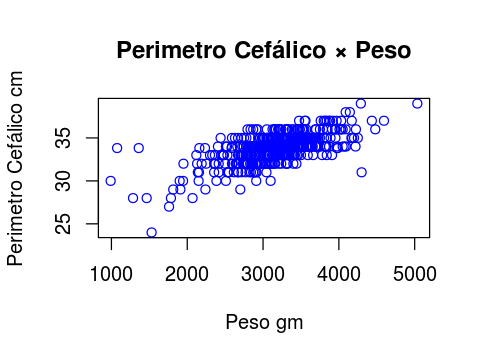

In [8]:
options(repr.plot.width=4, repr.plot.height=3)

plot(malaria$peso, malaria$pc, 
        main = 'Perimetro Cefálico × Peso',
        xlab = 'Peso gm', ylab = 'Perimetro Cefálico cm',
        col = 'blue')

#abline(lm(malaria$pc ~ malaria$peso), col="red") # regression line (y~x)

In [9]:
# Vamos ver agora Cefálico × Estatura

cor(malaria$est, malaria$pc)

ERROR: Error in cor(malaria$est, malaria$pc): 'x' must be numeric


In [10]:
# Vamos mudar para númerico e substituir os valores nulos pela média da coluna
malaria$est <- as.numeric(malaria$est)
malaria$est <- na.aggregate(malaria$est)

Warning message in eval(expr, envir, enclos):
“NAs introduzidos por coerção”

In [11]:
cor(malaria$est, malaria$pc)

[1] 0.5543555

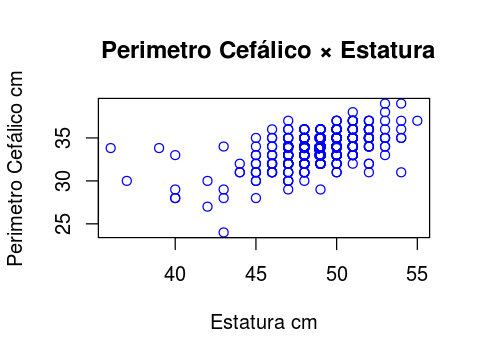

In [12]:
plot(malaria$est, malaria$pc, 
        main = ' Perimetro Cefálico × Estatura',
        xlab = 'Estatura cm', ylab = 'Perimetro Cefálico cm',
        col = 'blue')

(b) Escolha a variável com maior correlação e determine a reta de re-
gressão. Para um recém-nascido com peso de 3000 g e estatura de 50 cm ,
qual o valor predito de Perimetro Cefálico?

In [13]:
# Modelo para o Perimetro Cefálico × Peso
modelo1 <- lm(malaria$pc ~ malaria$peso)

In [14]:
summary(modelo1)


Call:
lm(formula = malaria$pc ~ malaria$peso)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.2186 -0.7371  0.0000  0.6914  4.6034 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.685e+01  3.298e-01   81.42   <2e-16 ***
malaria$peso 2.199e-03  1.029e-04   21.37   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.21 on 598 degrees of freedom
Multiple R-squared:  0.4329,	Adjusted R-squared:  0.432 
F-statistic: 456.5 on 1 and 598 DF,  p-value: < 2.2e-16


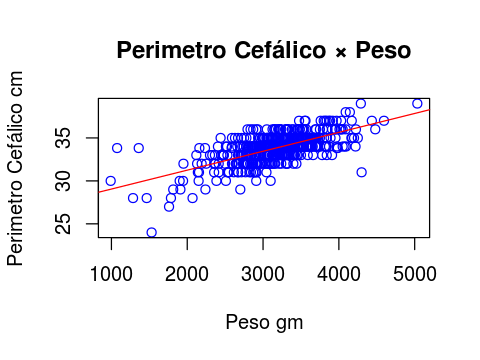

In [15]:
plot(malaria$pc ~ malaria$peso, 
        main = 'Perimetro Cefálico × Peso',
        xlab = 'Peso gm', ylab = 'Perimetro Cefálico cm',
        col = 'blue')
abline(modelo1, col="red") # linha de regressão (y~x)

In [16]:
# Para saber a fórmula para prever o pc para um peso de 3000 g
# vamos ver qual o intercepto e o coeficinte de inclinação

modelo1


Call:
lm(formula = malaria$pc ~ malaria$peso)

Coefficients:
 (Intercept)  malaria$peso  
   26.854064      0.002199  


In [17]:
# y = a + bx
a <- 26.854064
b <- 0.002199

y = a + b*3000

# O modelo estima que o 
# perímeto Cefálico para 
# um recem nascido com 3000 g é
y

[1] 33.45106

In [18]:
# Modelo para Perimetro Cefálico × Estatura
modelo2 <- lm(malaria$pc ~ malaria$est)

In [19]:
summary(modelo2)


Call:
lm(formula = malaria$pc ~ malaria$est)

Residuals:
    Min      1Q  Median      3Q     Max 
-7.3037 -0.7091  0.0000  0.7165  5.4976 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 12.99929    1.27954   10.16   <2e-16 ***
malaria$est  0.42568    0.02613   16.29   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.338 on 598 degrees of freedom
Multiple R-squared:  0.3073,	Adjusted R-squared:  0.3062 
F-statistic: 265.3 on 1 and 598 DF,  p-value: < 2.2e-16


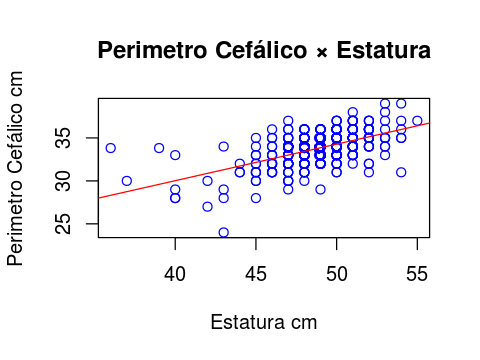

In [20]:
plot(malaria$pc ~ malaria$est, 
        main = 'Perimetro Cefálico × Estatura',
        xlab = 'Estatura cm', ylab = 'Perimetro Cefálico cm',
        col = 'blue')
abline(modelo2, col="red") # linha de regressão (y~x)

In [21]:
modelo2


Call:
lm(formula = malaria$pc ~ malaria$est)

Coefficients:
(Intercept)  malaria$est  
    12.9993       0.4257  


In [22]:
# y = a + bx
a <- 12.9993
b <- 0.4257

y = a + b*50

# O modelo estima que o 
# perímeto Cefálico para
# um bebê com estatura de 50 cm é
y

[1] 34.2843

(c) Vamos separar os recém-nascidos em dois grupos conforme a condição da sua mãe: Não infectada (Controle) e Infectada com algum tipo de parasita (Malária). Determine o diagrama de dispersão para Perimetro Cefálico × Peso , diferenciando os pontos conforme o grupo que pertence o recém-nascido.

In [35]:
# criando as variáveis dummy
malaria['GRUPO'] <- ifelse(malaria$grupo != 0, 'malaria', 'controle')

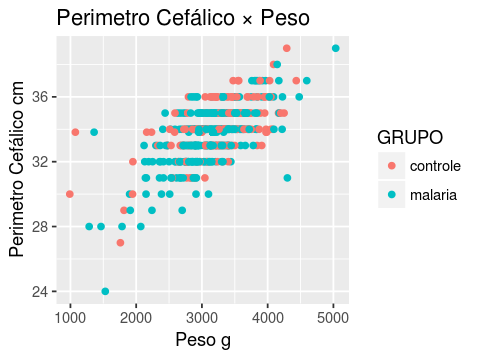

In [39]:
ggplot(data = malaria) + 
  geom_point(mapping = aes(x = peso, y = pc, color = GRUPO)) +
  labs(x = 'Peso g', y = 'Perimetro Cefálico cm', title = 'Perimetro Cefálico × Peso')

(d) Ajuste um modelo de regressão considerando como variável resposta o Perimetro Cefálico e as variáveis explicativas associadas a mãe: Grupo (0=Controle ; 1=Malária) e Idade (0=até 35 anos; 1=mais de 35 anos).
Interprete os parâmetros desse modelo. Obtenha a estimativa do desvio padrão dos erros e faça uma análise de resı́duos para o modelo.

In [40]:
# criando as variáveis dummy
malaria['grupo_dummy'] <- ifelse(malaria$grupo != 0, 1, 0)
malaria['idade_dummy'] <- ifelse(malaria$idade < 35, 0, 1)

In [41]:
modelo3 <- lm(malaria$pc ~ malaria$grupo_dummy + malaria$idade_dummy)

In [42]:
modelo3


Call:
lm(formula = malaria$pc ~ malaria$grupo_dummy + malaria$idade_dummy)

Coefficients:
        (Intercept)  malaria$grupo_dummy  malaria$idade_dummy  
            34.0736              -0.4165               0.2625  


In [43]:
summary(modelo3)


Call:
lm(formula = malaria$pc ~ malaria$grupo_dummy + malaria$idade_dummy)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.6571 -0.6571  0.1644  0.9264  5.3429 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)          34.0736     0.1095 311.217  < 2e-16 ***
malaria$grupo_dummy  -0.4165     0.1357  -3.070  0.00224 ** 
malaria$idade_dummy   0.2625     0.2856   0.919  0.35843    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.595 on 597 degrees of freedom
Multiple R-squared:  0.01679,	Adjusted R-squared:  0.0135 
F-statistic: 5.098 on 2 and 597 DF,  p-value: 0.006375
